# Analyse des features importances

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import load

df = pd.read_csv("../data/preprocessed/X_train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38288 entries, 0 to 38287
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   place         38288 non-null  int64  
 1   catu          38288 non-null  int64  
 2   sexe          38288 non-null  int64  
 3   secu1         38288 non-null  float64
 4   year_acc      38288 non-null  int64  
 5   victim_age    38288 non-null  float64
 6   catv          38288 non-null  float64
 7   obsm          38288 non-null  float64
 8   motor         38288 non-null  float64
 9   catr          38288 non-null  int64  
 10  circ          38288 non-null  float64
 11  surf          38288 non-null  float64
 12  situ          38288 non-null  float64
 13  vma           38288 non-null  float64
 14  jour          38288 non-null  int64  
 15  mois          38288 non-null  int64  
 16  lum           38288 non-null  int64  
 17  dep           38288 non-null  int64  
 18  com           38288 non-nu

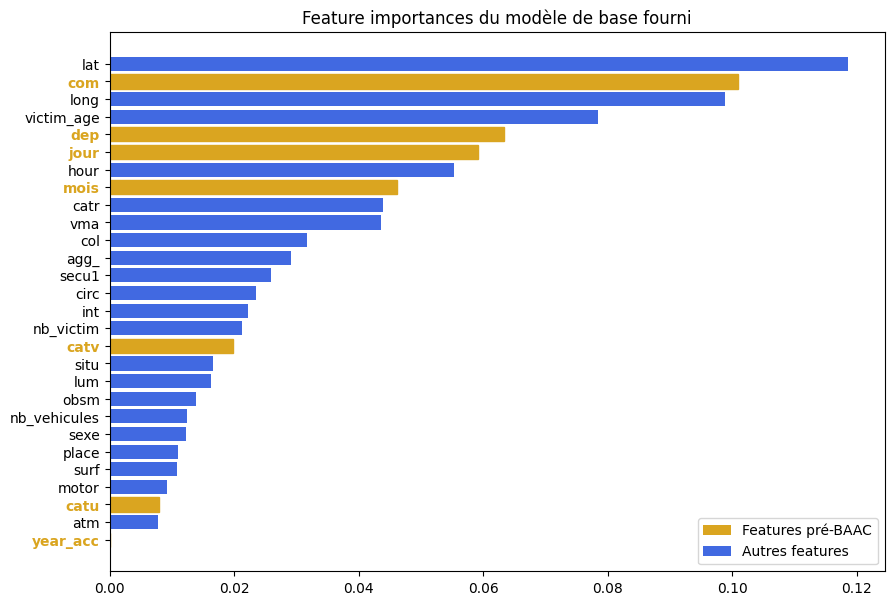

In [41]:
# Chargement du modèle:
rdf = load('../src/models/trained_model.joblib')

# Création d'un df feature_importance:
coefficients = rdf.feature_importances_
feature_importance = pd.DataFrame({'Feature' : df.columns, 'Importance' : np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending = True)

# Liste des features renseignées dans le pré BAAC et utilisées par le modèle:
preBAAC_features = ['catu', 'catv', 'jour', 'mois', 'dep', 'com', 'year_acc']

# Plot des feature importances:
fig, ax = plt.subplots(figsize = (10,7))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color = 'royalblue')
ax.set_title('Feature importances du modèle de base fourni')

# Mise en évidence des features renseignées dans le pré-BAAC:
for i, feat in enumerate(feature_importance['Feature']):
    if feat in preBAAC_features:
        ax.get_yticklabels()[i].set_color("goldenrod")
        ax.get_yticklabels()[i].set_weight("bold")
        bars[i].set_color('goldenrod')

# Personnaliser la légende des couleurs spéciales
special_patch = plt.Rectangle((0, 0), 1, 1, fc='goldenrod', edgecolor='none')
default_patch = plt.Rectangle((0, 0), 1, 1, fc='royalblue', edgecolor='none')
ax.legend([special_patch, default_patch], ['Features pré-BAAC', 'Autres features'], loc='lower right')
plt.show()